## 4. Evaluation Metrics for Classification

### 4.1 Evaluation metrics:session overview

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv("C:/Users/justine.o_kobo360/Desktop/ML ZoomCamp Tutorials/Python Scripts/Churn_data.zip")

df.columns = df.columns.str.lower().str.replace(" ", "_")

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(" ", "_")
    
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)



In [4]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)


df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']


In [5]:
list(df.columns)


['customerid',
 'gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'tenure',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'monthlycharges',
 'totalcharges',
 'churn']

In [6]:
numerical = ['tenure', 'monthlycharges', 'totalcharges',]

categorical = [
 'gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 ]

In [7]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [8]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(churn_decision == y_val).mean()

0.8034066713981547

## 4.2 Accuracy and dummy model

.Evaluate the model on different thresholds

.Check the accuracy of dummy baselines


In [9]:
len(y_val)

1409

In [10]:
(churn_decision == y_val).sum()

1132

In [11]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    churn_decision = (y_pred >= t)
    score = (y_val == churn_decision).mean()
    print('%.2f %.3f'% (t, score))
    scores.append(score)

0.00 0.274
0.05 0.509
0.10 0.591
0.15 0.666
0.20 0.710
0.25 0.739
0.30 0.760
0.35 0.772
0.40 0.785
0.45 0.793
0.50 0.803
0.55 0.801
0.60 0.795
0.65 0.786
0.70 0.766
0.75 0.744
0.80 0.735
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


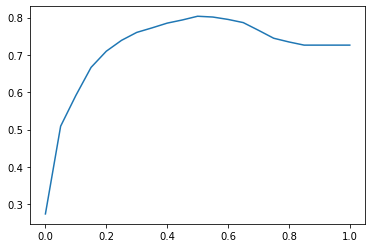

In [12]:
plt.plot(thresholds, scores)

In [13]:
from sklearn.metrics import accuracy_score

thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val ,y_pred >= t)
    print('%.2f %.3f'% (t, score))
    scores.append(score)

0.00 0.274
0.05 0.509
0.10 0.591
0.15 0.666
0.20 0.710
0.25 0.739
0.30 0.760
0.35 0.772
0.40 0.785
0.45 0.793
0.50 0.803
0.55 0.801
0.60 0.795
0.65 0.786
0.70 0.766
0.75 0.744
0.80 0.735
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


In [14]:
from collections import Counter

Counter(y_pred >= 1.0)

Counter({False: 1409})

In [15]:
Counter(y_val)

Counter({0: 1023, 1: 386})

In [16]:
(y_val).mean()

0.2739531582682754

## 4.3 Confusion table 

.Different types of errors and correct decisions

. Arranging them in a table 

In [17]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [18]:
actual_positive.sum()

386

In [19]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [20]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

In [21]:
tp, tn

(210, 922)

In [22]:
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [23]:
fp, fn

(101, 176)

In [24]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
    
])

In [25]:
(confusion_matrix / confusion_matrix.sum()).round(3)

array([[0.654, 0.072],
       [0.125, 0.149]])

## 4.4 Precision and Recall

In [26]:
(tp + tn) / (tp + tn + fp + fn)

0.8034066713981547

In [27]:
p = tp / (tp + fp)

In [28]:
p

0.6752411575562701

In [29]:
tp

210

In [30]:
tp + fp

311

In [31]:
r = tp / (tp + fn)

In [32]:
r

0.5440414507772021

In [33]:
tp + fn

386

### 4.5 ROC Curves

TPR and FRP

In [34]:
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

In [35]:
tpr, fpr

(0.5440414507772021, 0.09872922776148582)

In [36]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t,  tp, tn, fp, fn))

In [37]:
cols = ['threshold', 'tp', 'tn', 'fp', 'fn']

df_scores = pd.DataFrame(scores, columns=cols)

In [38]:
df_scores.iloc[:: 2].head()

,threshold,tp,tn,fp,fn
0,0.00,386,0,1023,0
2,0.02,384,193,830,2
4,0.04,381,308,715,5
6,0.06,377,362,661,9
8,0.08,371,410,613,15


In [39]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

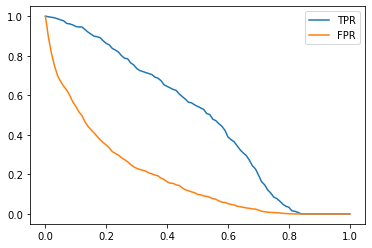

In [40]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
plt.legend()

### Random model

In [41]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))

In [42]:
((y_rand >= 0.5) == y_val).mean()

0.5017743080198722

In [43]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
    
        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)
    
        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()
    
        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()
    
        scores.append((t,  tp, tn, fp, fn))
        
        
    cols = ['threshold', 'tp', 'tn', 'fp', 'fn']
    df_scores = pd.DataFrame(scores, columns=cols)
        
    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)    
    
    
    return df_scores

In [44]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)

In [45]:
df_rand.iloc[:: 10]

,threshold,tp,tn,fp,fn,tpr,fpr
0,0.0,386,0,1023,0,1.000000,1.000000
10,0.1,347,100,923,39,0.898964,0.902248
20,0.2,307,201,822,79,0.795337,0.803519
30,0.3,276,299,724,110,0.715026,0.707722
40,0.4,237,399,624,149,0.613990,0.609971
50,0.5,202,505,518,184,0.523316,0.506354
60,0.6,161,614,409,225,0.417098,0.399804
70,0.7,121,721,302,265,0.313472,0.295210
80,0.8,78,817,206,308,0.202073,0.201369
90,0.9,40,922,101,346,0.103627,0.098729


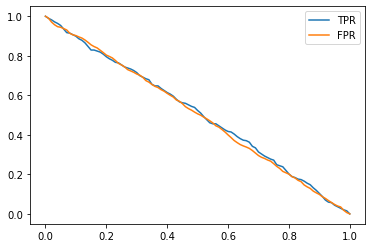

In [46]:
plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR')
plt.legend()

## Ideal Model

In [47]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(1023, 386)

In [48]:
y_ideal = np.repeat([0, 1], [num_neg, num_pos])

In [49]:
y_ideal_pred = np.linspace(0, 1, len(y_val))

In [50]:
((y_ideal_pred >= 0.726) == y_ideal).mean()

1.0

In [51]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)

In [52]:
df_ideal.iloc[::10].head()

,threshold,tp,tn,fp,fn,tpr,fpr
0,0.0,386,0,1023,0,1.0,1.00000
10,0.1,386,141,882,0,1.0,0.86217
20,0.2,386,282,741,0,1.0,0.72434
30,0.3,386,423,600,0,1.0,0.58651
40,0.4,386,564,459,0,1.0,0.44868


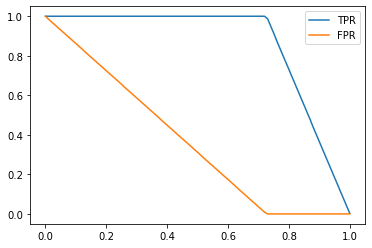

In [53]:
plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR')
plt.legend()

#### Putting everything together

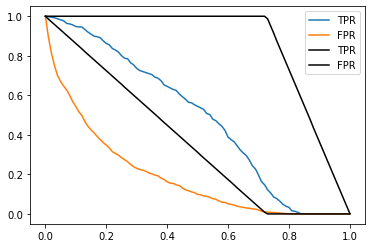

In [54]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')

# plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
# plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR')

plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR', color='black')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR', color='black')



plt.legend()

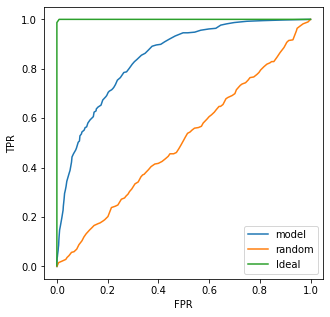

In [55]:
plt.figure(figsize=(5, 5))

plt.plot(df_scores.fpr, df_scores.tpr, label='model')
plt.plot(df_rand.fpr, df_rand.tpr, label='random')
plt.plot(df_ideal.fpr, df_ideal.tpr, label='Ideal')

plt.ylabel('TPR')
plt.xlabel('FPR')


plt.legend()

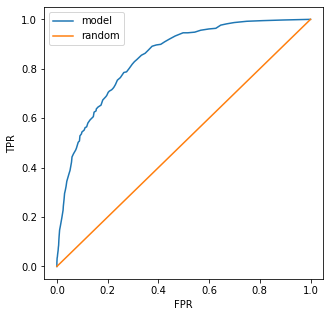

In [56]:
plt.figure(figsize=(5, 5))

plt.plot(df_scores.fpr, df_scores.tpr, label='model')
plt.plot([0, 1], [0, 1], label='random')


plt.ylabel('TPR')
plt.xlabel('FPR')


plt.legend()

In [57]:
from sklearn.metrics import roc_curve

In [58]:
fpr, tpr,  threshold = roc_curve(y_val, y_pred)

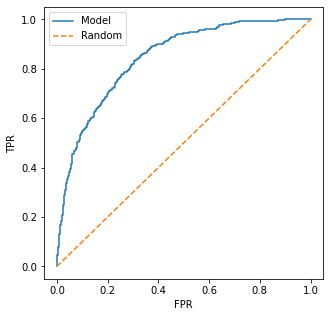

In [59]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')


plt.ylabel('TPR')
plt.xlabel('FPR')


plt.legend()

### 4.6 ROC AUC
.Area under the ROC curve - useful metric

. interpretation 

In [60]:
from sklearn.metrics import auc

In [61]:
auc(fpr, tpr)

0.8438530381535563

In [62]:
auc(df_scores.fpr, df_scores.tpr)

0.8438732975754537

In [63]:
auc(df_ideal.fpr, df_ideal.tpr)

0.9999430203759136

In [64]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
auc(fpr, tpr)

0.8438530381535563

In [65]:
from sklearn.metrics import roc_auc_score

In [66]:
roc_auc_score(y_val, y_pred)

0.8438530381535563

In [67]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

In [68]:
import random 

In [69]:
n = 100000
success = 0

for i in range(n):
    pos_ind = random.randint(0,  len(pos) - 1)
    neg_ind = random.randint(0,  len(neg) - 1)
    
    if pos[pos_ind] > neg[neg_ind]:
        success = success + 1 
        
success / n 

0.84266

In [70]:
n = 50000

np.random.seed(1)
pos_ind = np.random.randint(0,  len(pos), size=n)
neg_ind = np.random.randint(0,  len(neg), size=n)

In [71]:
(pos[pos_ind]  > neg[neg_ind]).mean()

0.84646

### Cross-Validation

.Evaluating the same model on different subsets of data

.Getting the average prediction and the spread within predictions

In [108]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    
    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [109]:
dv, model = train(df_train, y_train, C=0.001)

In [74]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict('records')
    
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]
    
    
    return y_pred
    

In [75]:
predict(df_val, dv, model)

array([0.00899645, 0.20452381, 0.21222324, ..., 0.13638763, 0.79976885,
       0.83740638])

In [76]:
from sklearn.model_selection import KFold

In [77]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [78]:
train_idx, val_idx = next(kfold.split(df_full_train))

In [79]:
len(train_idx), len(val_idx)

(5070, 564)

In [80]:
df_val = df_full_train.iloc[train_idx]
df_val = df_full_train.iloc[val_idx]

In [81]:
y_pred.sum()

379.5973120336648

In [105]:
!pip install tqdm


In [106]:
from tqdm.auto import tqdm

In [110]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=10, shuffle=True, random_state=1)
    
    scores = []
    
    for train_idx, val_idx in (kfold.split(df_full_train)):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
    
        y_train = df_train.churn.values
        y_val = df_val.churn.values
    
        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv,  model)
    
        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
    
    print("C=%s %.3f +- %.3f" % (C, np.mean(scores), np.std(scores)))
    

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.826 +- 0.012
C=0.01 0.841 +- 0.012
C=0.1 0.841 +- 0.011
C=0.5 0.841 +- 0.011
C=1 0.840 +- 0.013
C=5 0.841 +- 0.012
C=10 0.841 +- 0.012


In [84]:
scores

[0.8479398247539081,
 0.8409498762376237,
 0.8557214756739697,
 0.8327462760266645,
 0.8265818858560794,
 0.8342657342657342,
 0.8412732009117552,
 0.8186669829222013,
 0.8454424188528233,
 0.8630130079661188]

In [86]:
np.mean(scores), np.std(scores)

(0.8406600683466878, 0.012602508465092022)

In [95]:
print("%.3f +- %.3f" % (np.mean(scores), np.std(scores)))

0.841 +- 0.013


In [112]:
dv, model = train(df_full_train, df_full_train.churn.values, C=1.0)
y_pred = predict(df_test, dv,  model)
    
auc = roc_auc_score(y_test, y_pred)
auc

0.8572386167896259

### 4.8 Summary
. Metric - a single number that describes the performance of a model

. Accuracy - fraction of correct answers; sometimes misleading 

. Precision and recall are less misleading when we have class inbalance

. ROC Curve - a way to evaluate the performance at all thresholds; okay to use with imbalance

. K-Fold CV - more reliable estimate for performance (mean + std)



## Explore More 

. F1  score = 2 * P * R / (P + R)

. Evaluate precision and recall at different thresholds, plot P vs R - this way you'll get 
  the precision/recall curve (similar to ROC curve)

. Area under the PR curve is also useful metric


Other Projects:
    . Calculate the metrics for datasets from previous week